In [169]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.axes as ax
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

In [136]:
df=pd.read_csv("Life Expectancy Data.csv")

In [137]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [138]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [139]:
df.dropna(inplace=True)

In [140]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [141]:
df=df.iloc[:,3:]

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  1649 non-null   float64
 1   Adult Mortality                  1649 non-null   float64
 2   infant deaths                    1649 non-null   int64  
 3   Alcohol                          1649 non-null   float64
 4   percentage expenditure           1649 non-null   float64
 5   Hepatitis B                      1649 non-null   float64
 6   Measles                          1649 non-null   int64  
 7    BMI                             1649 non-null   float64
 8   under-five deaths                1649 non-null   int64  
 9   Polio                            1649 non-null   float64
 10  Total expenditure                1649 non-null   float64
 11  Diphtheria                       1649 non-null   float64
 12   HIV/AIDS                

<Axes: >

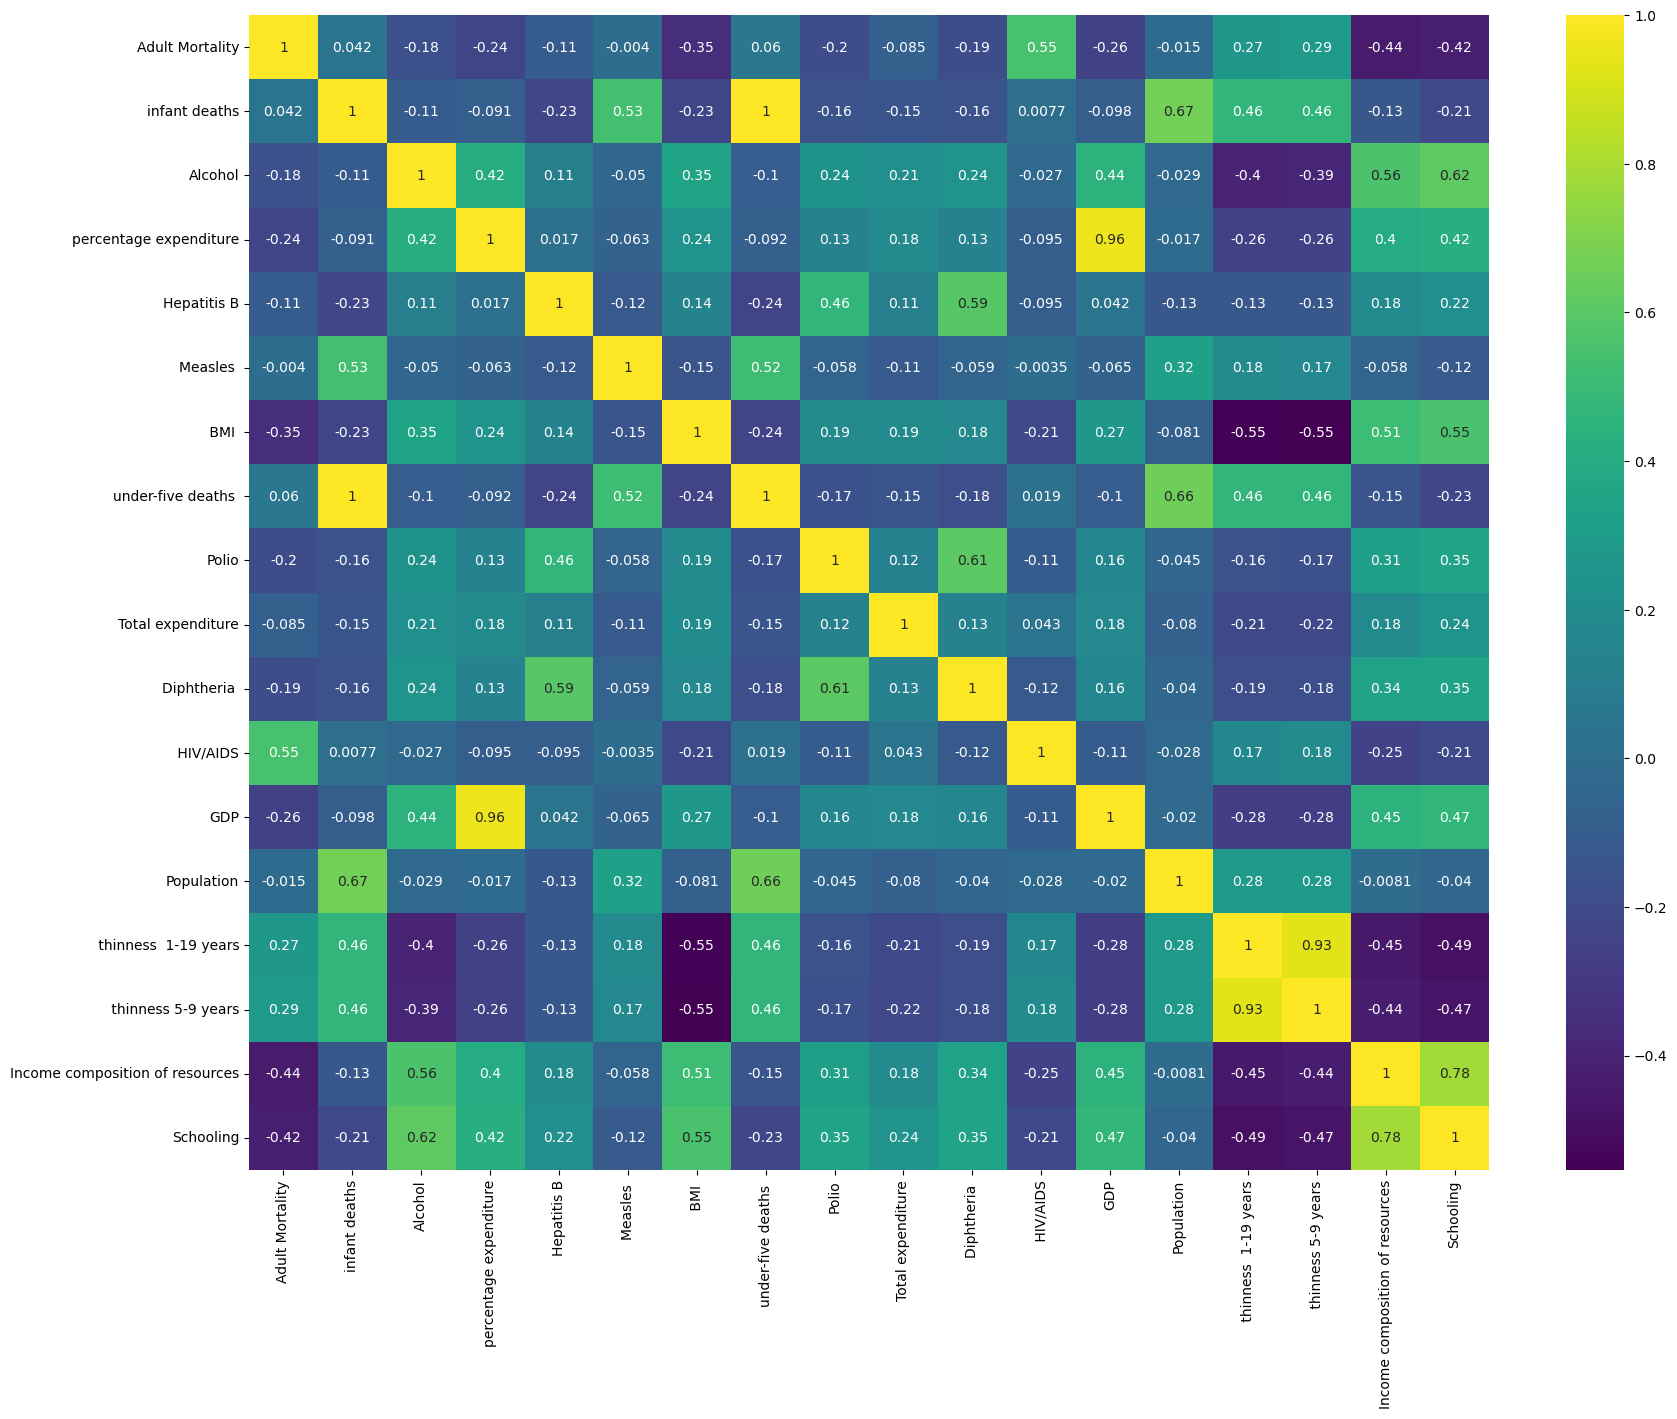

In [163]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot=True,cmap='viridis')




In [144]:
output_col=df['Life expectancy ']


In [145]:
output_col.shape

(1649,)

In [146]:
df=df.iloc[:,1:]
df.shape

(1649, 18)

In [152]:
x_train,x_test,y_train,y_test=train_test_split(df,output_col,test_size=0.25,random_state=43)

In [153]:
x_train.shape

(1236, 18)

In [154]:
y_train.shape

(1236,)

In [155]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [156]:
lr_model.coef_

array([-1.76643648e-02,  8.62241984e-02, -4.60241698e-02,  3.34710015e-04,
       -7.65617779e-03, -7.65604737e-06,  2.97284566e-02, -6.50582179e-02,
        5.36268317e-03,  4.44427398e-02,  1.81720188e-02, -4.23690875e-01,
        1.34843550e-05, -3.06053688e-10, -3.82499906e-02, -3.71825517e-02,
        9.42893582e+00,  9.11289730e-01])

In [157]:
lr_model.intercept_

53.70501832775899

In [158]:
prediction= lr_model.predict(x_test)
prediction

array([77.26008524, 36.82123247, 62.09922368, 63.02004774, 67.0544023 ,
       67.93708785, 70.10024886, 70.73152635, 80.35183322, 50.14009281,
       72.67082934, 59.57875408, 51.82980367, 74.34994528, 69.13140021,
       79.48011089, 79.67925912, 65.20947253, 81.76848944, 72.23818091,
       72.34907157, 78.84034727, 77.55553101, 51.30419555, 58.67242123,
       61.42644088, 72.8826771 , 75.31585137, 56.86577266, 73.82092247,
       74.51493665, 74.75529074, 67.60878348, 75.25382159, 55.09612858,
       56.9515366 , 50.98036819, 60.87215804, 63.90881723, 74.32134565,
       78.32473247, 77.57036108, 67.66439477, 75.11786647, 70.88626048,
       83.19398031, 64.78239683, 74.54858304, 62.82624282, 72.30134401,
       59.78098388, 65.02370053, 72.31487375, 70.08540506, 75.95937388,
       70.73707609, 80.55062264, 73.22888441, 71.55335311, 77.27641336,
       65.16665017, 60.97254094, 56.80122171, 68.81659472, 62.1579828 ,
       77.44543114, 75.63568861, 67.6036973 , 54.98836869, 63.02

In [159]:
#finding the cost 
cost=mean_squared_error(y_test,prediction)
cost

13.528856619819665

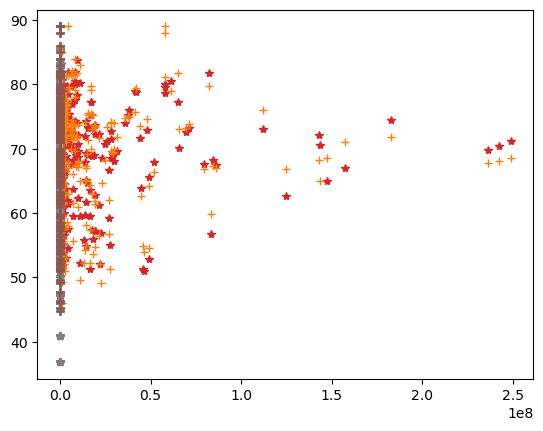

In [160]:
plt.plot(x_test,prediction,"*")
plt.plot(x_test,y_test,"+")

In [164]:
x_test

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
548,86.0,2,7.26,211.614293,94.0,6,61.2,2,93.0,7.00,94.0,0.1,1475.692420,17153357.0,0.8,0.8,0.820,15.4
2502,587.0,3,5.52,131.042127,88.0,37,26.7,4,87.0,5.16,85.0,49.9,1324.996228,1893.0,8.6,8.8,0.502,9.2
1497,281.0,10,3.88,40.033441,64.0,1,23.4,14,79.0,11.83,75.0,2.4,232.617320,3662993.0,7.7,7.6,0.394,9.8
1022,38.0,41,1.53,31.094353,8.0,1939,21.2,63,8.0,3.12,8.0,3.4,373.281554,2446782.0,8.6,8.5,0.489,7.9
1784,27.0,47,0.33,21.236988,4.0,2046,2.5,61,9.0,1.87,84.0,0.5,1186.423937,555331.0,13.0,13.3,0.526,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,76.0,0,12.60,7163.348923,98.0,70,63.4,1,99.0,1.59,99.0,0.1,47439.396840,112957.0,1.0,1.0,0.890,16.3
2690,126.0,28,1.29,103.523776,82.0,34,58.5,34,9.0,5.81,9.0,0.1,834.869161,6876345.0,5.0,4.8,0.687,11.9
1761,15.0,25,0.46,66.729339,92.0,6000,46.5,29,94.0,5.31,94.0,0.1,1413.757176,29512368.0,6.6,6.5,0.540,8.8
2651,172.0,0,6.71,167.265791,92.0,0,45.0,0,94.0,5.98,92.0,0.3,1967.832830,1348248.0,5.8,6.0,0.773,12.7


In [167]:
r_2=r2_score(y_test,prediction)
r_2

0.8127383576687086

Ordinary Least Square (OLS) Method

In [172]:
import statsmodels.api as sm

In [171]:
df

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [174]:
x_with_constant=sm.add_constant(x_train)
x_with_constant

,const,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
955,1.0,288.0,2,8.01,40.537198,52.0,90,31.4,3,44.0,2.88,45.0,10.7,727.777345,1444844.0,7.1,6.9,0.646,12.4
2836,1.0,192.0,24,1.78,40.133421,99.0,737,37.5,28,99.0,5.11,99.0,0.3,546.776852,26167.0,3.2,3.2,0.620,11.7
1685,1.0,12.0,32,5.23,150.408875,82.0,0,62.1,37,83.0,6.30,83.0,0.1,1298.867660,122535969.0,1.6,1.5,0.753,12.9
1792,1.0,231.0,69,0.40,3.824212,8.0,830,15.2,93,86.0,1.97,78.0,0.5,219.782326,47624894.0,13.3,13.6,0.445,7.7
1985,1.0,37.0,11,0.84,12.055520,63.0,1222,41.1,15,61.0,6.42,72.0,1.5,77.577349,631479.0,1.4,1.4,0.446,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,1.0,74.0,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
88,1.0,129.0,10,8.16,1105.659031,85.0,0,58.0,12,92.0,6.49,91.0,0.1,7193.617640,3997224.0,1.1,0.9,0.788,16.3
423,1.0,35.0,23,4.33,15.994152,92.0,173,15.2,35,89.0,7.86,92.0,2.9,196.247263,8212264.0,7.9,7.9,0.319,7.9
393,1.0,161.0,1,10.39,508.630459,96.0,1,6.3,1,96.0,6.67,95.0,0.1,4513.136280,76122.0,2.2,2.2,0.750,13.5


In [175]:
model=sm.OLS(y_train,x_with_constant)

In [176]:
result= model.fit()

In [177]:
result.params

const                              5.370502e+01
Adult Mortality                   -1.766436e-02
infant deaths                      8.622420e-02
Alcohol                           -4.602417e-02
percentage expenditure             3.347100e-04
Hepatitis B                       -7.656178e-03
Measles                           -7.656047e-06
 BMI                               2.972846e-02
under-five deaths                 -6.505822e-02
Polio                              5.362683e-03
Total expenditure                  4.444274e-02
Diphtheria                         1.817202e-02
 HIV/AIDS                         -4.236909e-01
GDP                                1.348436e-05
Population                        -3.060537e-10
 thinness  1-19 years             -3.824999e-02
 thinness 5-9 years               -3.718255e-02
Income composition of resources    9.428936e+00
Schooling                          9.112897e-01
dtype: float64

In [182]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     357.0
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:09:55   Log-Likelihood:                -3318.5
No. Observations:                1236   AIC:                             6675.
Df Residuals:                    1217   BIC:                             6772.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [183]:
x_test=sm.add_constant(x_test)
x_test

,const,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
548,1.0,86.0,2,7.26,211.614293,94.0,6,61.2,2,93.0,7.00,94.0,0.1,1475.692420,17153357.0,0.8,0.8,0.820,15.4
2502,1.0,587.0,3,5.52,131.042127,88.0,37,26.7,4,87.0,5.16,85.0,49.9,1324.996228,1893.0,8.6,8.8,0.502,9.2
1497,1.0,281.0,10,3.88,40.033441,64.0,1,23.4,14,79.0,11.83,75.0,2.4,232.617320,3662993.0,7.7,7.6,0.394,9.8
1022,1.0,38.0,41,1.53,31.094353,8.0,1939,21.2,63,8.0,3.12,8.0,3.4,373.281554,2446782.0,8.6,8.5,0.489,7.9
1784,1.0,27.0,47,0.33,21.236988,4.0,2046,2.5,61,9.0,1.87,84.0,0.5,1186.423937,555331.0,13.0,13.3,0.526,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,1.0,76.0,0,12.60,7163.348923,98.0,70,63.4,1,99.0,1.59,99.0,0.1,47439.396840,112957.0,1.0,1.0,0.890,16.3
2690,1.0,126.0,28,1.29,103.523776,82.0,34,58.5,34,9.0,5.81,9.0,0.1,834.869161,6876345.0,5.0,4.8,0.687,11.9
1761,1.0,15.0,25,0.46,66.729339,92.0,6000,46.5,29,94.0,5.31,94.0,0.1,1413.757176,29512368.0,6.6,6.5,0.540,8.8
2651,1.0,172.0,0,6.71,167.265791,92.0,0,45.0,0,94.0,5.98,92.0,0.3,1967.832830,1348248.0,5.8,6.0,0.773,12.7


In [185]:
y_predict=result.predict(x_test)
y_predict

548     77.260085
2502    36.821232
1497    62.099224
1022    63.020048
1784    67.054402
          ...    
241     81.417380
2690    70.157043
1761    69.374955
2651    71.805025
1352    73.106334
Length: 413, dtype: float64

In [ ]:
# Q1 = df['km_driven'].quantile(0.25)
# Q3 = df['km_driven'].quantile(0.75)
# IQR = Q3 - Q1
# lower = Q1 - 1.5*IQR
# upper = Q3 + 1.5*IQR
# upper_array = np.where(df['km_driven'] >= upper)[0]
# lower_array = np.where(df['km_driven'] <= lower)[0]
 
# # Removing the outliers
# df.drop(index=upper_array, inplace=True)
# df.drop(index=lower_array, inplace=True)

